In [40]:
from hashlib import new
import cv2
import numpy as np
from numpy import random as rd, uint8
from matplotlib import pyplot as plt

In [41]:
im_wid = 512
im_hei = 512
gm = 0.75

In [42]:
def curved(x):
    return 255*np.power(x/255, 1/gm)

In [43]:
def image_correct(img, channel):
    newimg = np.zeros(np.shape(img), dtype=uint8)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            newimg[i][j] = img[i][j];
            newimg[i][j][channel] = curved(img[i][j][channel])
    return newimg

In [44]:
def random(a,b):
    return np.round(a + rd.random()*(b-a), 2)

In [45]:
def create_scale_kernel(dw,dh):
    tx = -im_wid*((dw-1)/2)
    ty = -im_hei*((dh-1)/2)
    return np.float32([[dw, 0, tx],
                       [0, dh, ty]])

In [46]:
def create_offset_kernel(dx, dy):
    return np.float32([[1, 0, dx], [0, 1, dy]])

In [47]:
def horizontal_flip_kernel():
    return np.float32([[-1, 0, im_wid], [0, 1, 0]])

In [48]:
def vertical_flip_kernel():
    return np.float32([[1, 0, 0], [0, -1, im_hei]])

In [49]:
def create_rotate_kernel(angle):
    a = angle * 2*np.pi/360
    mx = im_wid/2
    my = im_hei/2
    alp = np.cos(a)
    bet = np.sin(a)
    kernel = np.float32([[alp, bet, (1-alp)*mx - bet*my],
                        [-bet, alp, bet*mx + (1-alp)*my]])
    return kernel

In [50]:
def lin_trans(source, kernel):
    return cv2.warpAffine(source, kernel, (source.shape[0], source.shape[1]))

In [51]:
def create_skew_kernel(ay, ax):
    mx = im_wid/2
    my = im_hei/2
    kernel = np.float32([[1, -ax,  ax*mx],
                        [-ay, 1, ay*my]])
    # kernel = np.float32([[1, -ax,  0],
    #                     [-ay, 1, 0]])
    return kernel

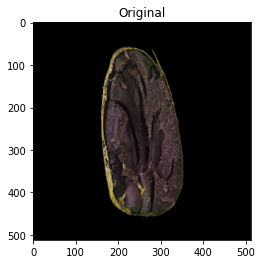

In [57]:
#LINUX
# img = cv2.imread('/home/flint/Documents/thesis2022/Python/data/bean.JPG')
#MacOS
# img = cv2.imread('/Users/lochuynhquang/Documents/thesis2022/Python/data/bean.png')
#Windows
img = cv2.imread('C:/Users/quang/Documents/thesis2022/Python/data/bean.JPG')
img = cv2.resize(img, (im_wid,im_hei))
img = image_correct(img, 1)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.title('Original')
plt.show()

In [60]:
newimg = lin_trans(img,create_skew_kernel(0.2,0.2))

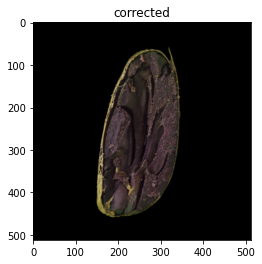

In [61]:
# newimg = cv2.cvtColor(newimg,cv2.COLOR_BGR2RGB)
plt.imshow(newimg)
plt.title('corrected')
plt.show()
